In [1]:
import numpy as np
from matplotlib.pyplot import *
from IPython.display import clear_output,display
from os import chdir
from pickle import dump,load,HIGHEST_PROTOCOL

In [2]:
def load_pkl(output_path,name):
    with open(output_path + name + '.pkl', 'rb') as f:
        return load(f)

def plot_multitime_series_significance(list_of_data_ctb,sig_t,tdel,zero_offset,condition_names):
    colours = ['r','g','b','m','c']
    markers = ['-','.','X','s','o']
    fig = figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    time = np.arange(sig_t.shape[0])*tdel-zero_offset #time and zero_offset in ms
    sig_time = np.copy(time)
    sig_time[sig_t==0.0] = np.nan
    for l,data_ctb in enumerate(list_of_data_ctb):
        for b in range(list_of_data_ctb[l].shape[2]):
            ax.plot(time,data_ctb[...,b].mean(0),markers[l],markersize=2.0,c=colours[b],alpha=1/16)
            ax.plot(sig_time,data_ctb[...,b].mean(0),markers[l],markersize=2.0,c=colours[b],alpha=1/2,label='%s, dimension %d'%(condition_names[l],b+1))
            ax.set_xlabel('Time (ms)')
    ax.legend()
data_path = 'C:\\...\\' #put the path of the data here
module_path = 'C:\\...\\' #put the path of the TW modules here
output_path = 'C:\\...\\' #path to save the results of permutation test
chdir(module_path)

In [3]:
from make_wavelet import *
from TW_analysis_complex_valued_unit_length_phase import *
from oneway_permutation_testing_multiple_dimensions import *

In [4]:
nBases = 2
N_cycles = 2
tdel = 2.0
frequency = 9.2
minf = 9.2 #if you analyse multiple frequencies, put the lowest frequency here
contact_xyz = load_pkl(data_path,'xyz_coordinates')

In [5]:
data1_cts = load_pkl(data_path,'avref_timeseries')
power_cts,phi1_cts = wavelet(data1_cts,N_cycles,frequency,tdel,minf)
print(phi1_cts.shape)
data2_cts = load_pkl(data_path,'avref_timeseries_stim')
power_cts,phi2_cts = wavelet(data2_cts,N_cycles,frequency,tdel,minf)
print(phi2_cts.shape)
phi_cts = np.concatenate((phi1_cts,phi2_cts),axis=0)

(26, 1442, 64)
(32, 1442, 64)


In [6]:
bases_sb,fit_ct,betas_ctb = C_TW_bases_betas(phi_cts,nBases=nBases)
print(bases_sb.shape,fit_ct.shape,betas_ctb.shape)
fit1_ct = fit_ct[:data1_cts.shape[0]]
fit2_ct = fit_ct[data1_cts.shape[0]:]
betas1_ctb = betas_ctb[:data1_cts.shape[0]]
betas2_ctb = betas_ctb[data1_cts.shape[0]:]
print(fit1_ct.shape,fit2_ct.shape,betas1_ctb.shape,betas2_ctb.shape)

[9.54089494 7.63834854]
(64, 2) (58, 1442) (58, 1442, 2)
(26, 1442) (32, 1442) (26, 1442, 2) (32, 1442, 2)


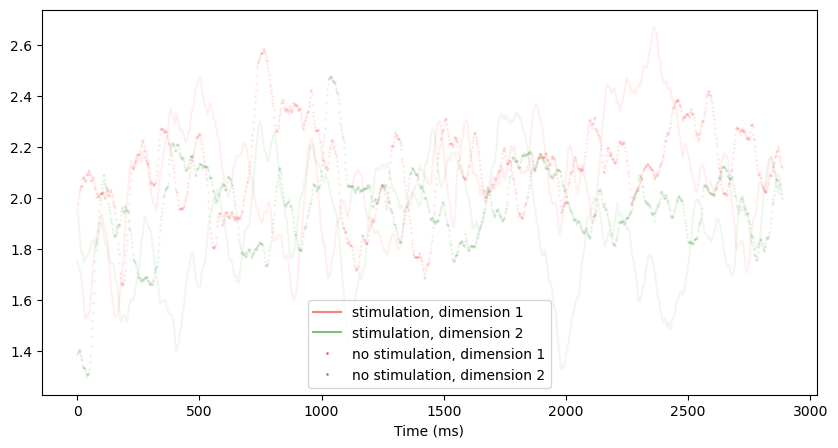

In [7]:
subject = 'test_subject'
condition_names  = ['stimulation','no stimulation']
measure = 'first two bases'
#find the significant differences over a trial, corrected for multiple comparisons and neighbouring-samples-within-trial correlations
sig_t = test_oneway(subject,frequency,output_path,condition_names,measure,[np.absolute(betas1_ctb),np.absolute(betas2_ctb)],p=0.05,permutations=1000)
#significant time periods will be shown in higher alpha levels
plot_multitime_series_significance([np.absolute(betas1_ctb),np.absolute(betas2_ctb)],sig_t,tdel,0.0,condition_names)

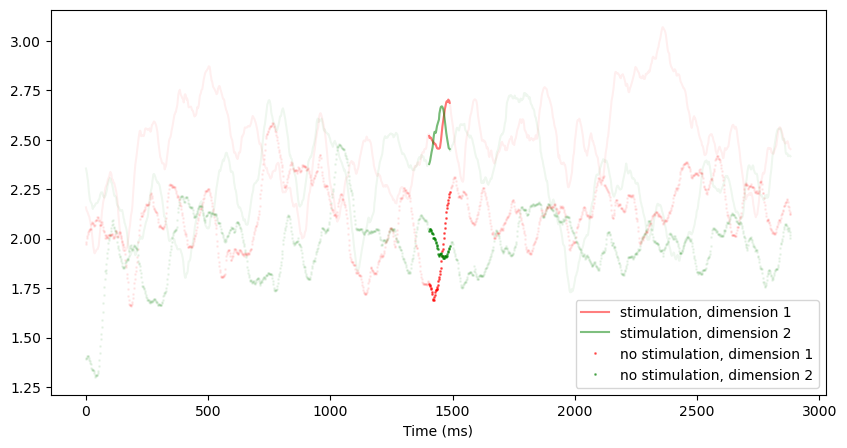

In [8]:
#no significant results, so lets add a dummy offset for illustration puproses
absbetas1_ctb = np.absolute(betas1_ctb)+0.4
sig_t = test_oneway(subject,frequency,output_path,condition_names,measure,[absbetas1_ctb,np.absolute(betas2_ctb)],p=0.05,permutations=1000)
plot_multitime_series_significance([absbetas1_ctb,np.absolute(betas2_ctb)],sig_t,tdel,0.0,condition_names)

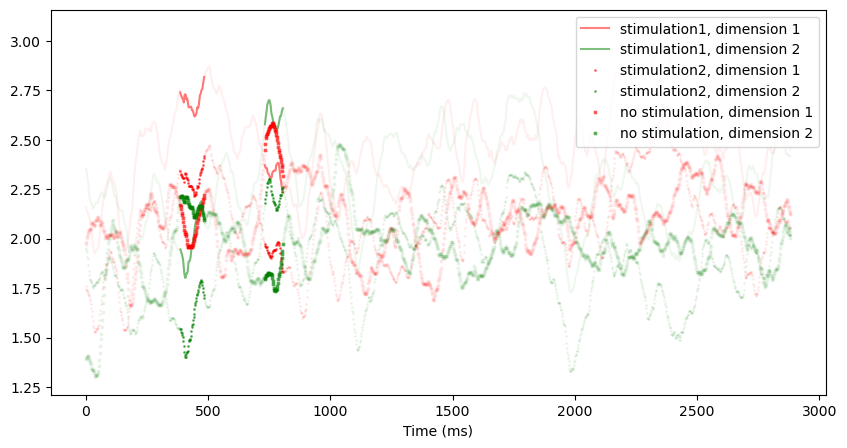

In [9]:
#add a third comparison for fun
condition_names  = ['stimulation1','stimulation2','no stimulation']
absbetas2_ctb = np.absolute(betas1_ctb)+0.0
sig_t = test_oneway(subject,frequency,output_path,condition_names,measure,[absbetas1_ctb,absbetas2_ctb,np.absolute(betas2_ctb)],p=0.05,permutations=1000)
plot_multitime_series_significance([absbetas1_ctb,absbetas2_ctb,np.absolute(betas2_ctb)],sig_t,tdel,0.0,condition_names)